**Unzipping the Dataset File**

In [1]:
!unzip /content/mit-bih-arrhythmia-database-1.0.0.zip

Archive:  /content/mit-bih-arrhythmia-database-1.0.0.zip
  inflating: mit-bih-arrhythmia-database-1.0.0/100.atr  
  inflating: mit-bih-arrhythmia-database-1.0.0/100.dat  
  inflating: mit-bih-arrhythmia-database-1.0.0/100.hea  
  inflating: mit-bih-arrhythmia-database-1.0.0/100.xws  
  inflating: mit-bih-arrhythmia-database-1.0.0/101.atr  
  inflating: mit-bih-arrhythmia-database-1.0.0/101.dat  
  inflating: mit-bih-arrhythmia-database-1.0.0/101.hea  
  inflating: mit-bih-arrhythmia-database-1.0.0/101.xws  
  inflating: mit-bih-arrhythmia-database-1.0.0/102-0.atr  
  inflating: mit-bih-arrhythmia-database-1.0.0/102.atr  
  inflating: mit-bih-arrhythmia-database-1.0.0/102.dat  
  inflating: mit-bih-arrhythmia-database-1.0.0/102.hea  
  inflating: mit-bih-arrhythmia-database-1.0.0/102.xws  
  inflating: mit-bih-arrhythmia-database-1.0.0/103.atr  
  inflating: mit-bih-arrhythmia-database-1.0.0/103.dat  
  inflating: mit-bih-arrhythmia-database-1.0.0/103.hea  
  inflating: mit-bih-arrhythm

**Checking what files are inside**

In [2]:
!ls

mit-bih-arrhythmia-database-1.0.0      sample_data
mit-bih-arrhythmia-database-1.0.0.zip


**Looking inside the Folder**

In [3]:
!ls mit-bih-arrhythmia-database-1.0.0

100.atr    106.dat  113.hea  119.hea  202.atr  209.xws	217.xws  230.atr
100.dat    106.hea  113.xws  119.xws  202.dat  210.atr	219.atr  230.dat
100.hea    106.xws  114.atr  121.atr  202.hea  210.dat	219.dat  230.hea
100.xws    107.atr  114.dat  121.dat  202.xws  210.hea	219.hea  230.xws
101.atr    107.dat  114.hea  121.hea  203.at-  210.xws	219.xws  231.atr
101.dat    107.hea  114.xws  121.xws  203.at_  212.atr	220.atr  231.dat
101.hea    107.xws  115.atr  122.atr  203.atr  212.dat	220.dat  231.hea
101.xws    108.at_  115.dat  122.dat  203.dat  212.hea	220.hea  231.xws
102-0.atr  108.atr  115.hea  122.hea  203.hea  212.xws	220.xws  232.atr
102.atr    108.dat  115.xws  122.xws  203.xws  213.atr	221.atr  232.dat
102.dat    108.hea  116.atr  123.atr  205.atr  213.dat	221.dat  232.hea
102.hea    108.xws  116.dat  123.dat  205.dat  213.hea	221.hea  232.xws
102.xws    109.atr  116.hea  123.hea  205.hea  213.xws	221.xws  233.atr
103.atr    109.dat  116.xws  123.xws  205.xws  214.at_	222.at_  

**Installing Library to read ECG files**

In [4]:
!pip install wfdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 109.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.3 which is incompatible.
cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.3 which is incompatible.
dask-cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.3 which is incompatible.


**Installing Necessary Libraries**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wfdb
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Reading one ECG Record**

In [6]:
#Read Patient record 100
record = wfdb.rdrecord('/content/mit-bih-arrhythmia-database-1.0.0/100')
annotation = wfdb.rdann('/content/mit-bih-arrhythmia-database-1.0.0/100','atr')

print('Successfully loaded ECG data!')
print(f'Patient ID:100')
print(f'ECG Signal shape: {record.p_signal.shape}')
print(f'Number of heartbeats: {len(annotation.sample)}')

Successfully loaded ECG data!
Patient ID:100
ECG Signal shape: (650000, 2)
Number of heartbeats: 2274


**Visualize one ECG Beat**

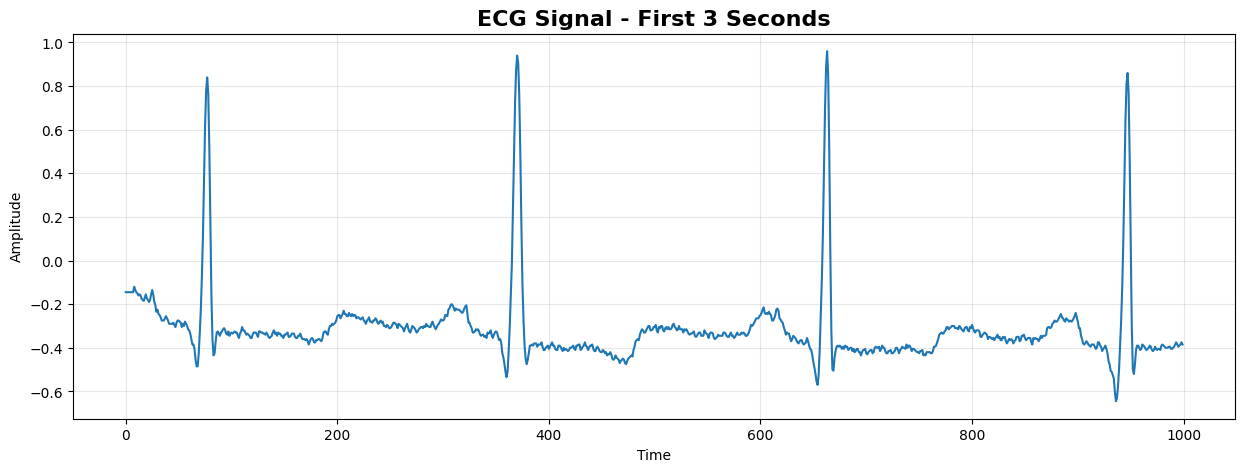

In [7]:
# Plot the first 3 seconds of ECG
plt.figure(figsize=(15, 5))
plt.plot(record.p_signal[:1000, 0])
plt.title('ECG Signal - First 3 Seconds', fontsize=16, fontweight='bold')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)
plt.show()

**Extracting Individual Heartbeats**

In [8]:
# Extract individual heartbeats
beats = []
labels = []

# Get ECG signal
ecg_signal = record.p_signal[:, 0]  # Use first channel

# For each heartbeat location
for i in range(len(annotation.sample)):
    beat_location = annotation.sample[i]
    beat_type = annotation.symbol[i]

    # Extract 90 samples before and 90 samples after the beat
    start = beat_location - 90
    end = beat_location + 90

    # Make sure we don't go out of bounds
    if start >= 0 and end < len(ecg_signal):
        beat_segment = ecg_signal[start:end]
        beats.append(beat_segment)
        labels.append(beat_type)

print(f"Extracted {len(beats)} heartbeats from patient 100!")
print(f"Beat types found: {set(labels)}")

Extracted 2271 heartbeats from patient 100!
Beat types found: {'A', 'V', 'N'}


**Visualize Different Beat Types**

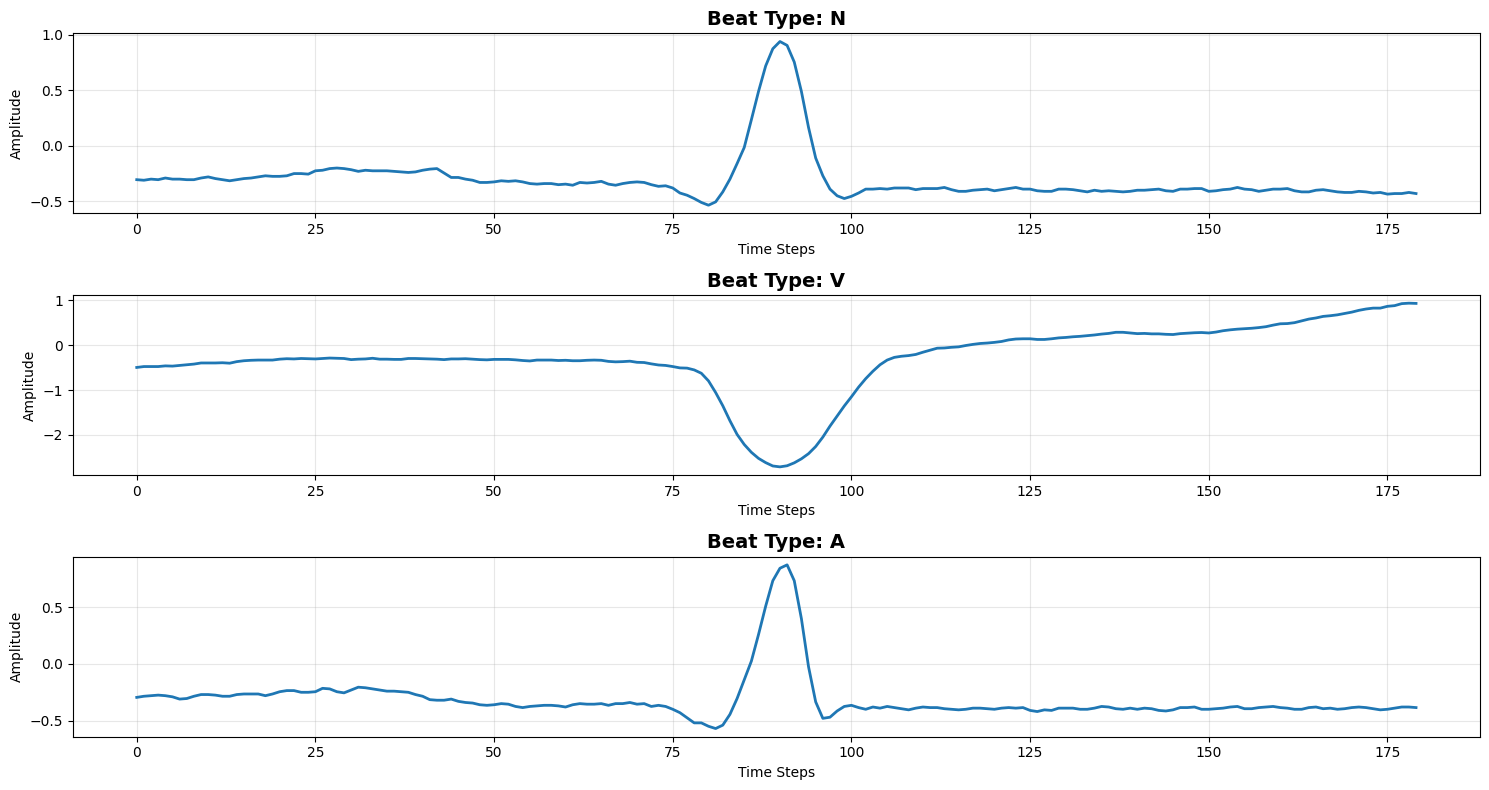

In [9]:
# Plot examples of each beat type
beat_types = ['N', 'V', 'A'] # N-Normal beats, V-Ventricular, A-Atrial(Supraventricular)

plt.figure(figsize=(15, 8))

for i, beat_type in enumerate(beat_types):
    # Find first beat of this type
    for j, label in enumerate(labels):
        if label == beat_type:
            plt.subplot(3, 1, i+1)
            plt.plot(beats[j], linewidth=2)
            plt.title(f'Beat Type: {beat_type}', fontsize=14, fontweight='bold')
            plt.xlabel('Time Steps')
            plt.ylabel('Amplitude')
            plt.grid(True, alpha=0.3)
            break

plt.tight_layout()
plt.show()

**Process ALL Patients**

In [10]:
# List of all patient IDs in MIT-BIH database
patient_ids = ['100', '101', '102', '103', '104', '105', '106', '107',
               '108', '109', '111', '112', '113', '114', '115', '116',
               '117', '118', '119', '121', '122', '123', '124', '200',
               '201', '202', '203', '205', '207', '208', '209', '210',
               '212', '213', '214', '215', '217', '219', '220', '221',
               '222', '223', '228', '230', '231', '232', '233', '234']

print(f"Total patients to process: {len(patient_ids)}")
print("This will take 3-5 minutes... Please wait!")
print("")

all_beats = []
all_labels = []

# Process each patient
for idx, patient_id in enumerate(patient_ids):
    try:
        # Read patient data
        record = wfdb.rdrecord(f'mit-bih-arrhythmia-database-1.0.0/{patient_id}')
        annotation = wfdb.rdann(f'mit-bih-arrhythmia-database-1.0.0/{patient_id}', 'atr')

        ecg_signal = record.p_signal[:, 0]

        # Extract beats
        for i in range(len(annotation.sample)):
            beat_location = annotation.sample[i]
            beat_type = annotation.symbol[i]

            start = beat_location - 90
            end = beat_location + 90

            if start >= 0 and end < len(ecg_signal):
                beat_segment = ecg_signal[start:end]
                all_beats.append(beat_segment)
                all_labels.append(beat_type)

        # Progress update every 10 patients
        if (idx + 1) % 10 == 0:
            print(f"Processed {idx + 1}/{len(patient_ids)} patients...")

    except:
        print(f"⚠ Skipped patient {patient_id}")
        continue

print("")
print(f"DONE! Total heartbeats extracted: {len(all_beats):,}")
print(f"Unique beat types: {set(all_labels)}")

Total patients to process: 48
This will take 3-5 minutes... Please wait!

Processed 10/48 patients...
Processed 20/48 patients...
Processed 30/48 patients...
Processed 40/48 patients...

DONE! Total heartbeats extracted: 112,579
Unique beat types: {'F', 'J', 'x', 'L', ']', '+', 'V', 'E', '~', '[', 'j', 'S', '|', '/', 'a', 'N', 'A', '!', 'Q', 'f', '"', 'e', 'R'}


**Grouping Beat Types into 5 Main Categories**

In [11]:
# Map all beat types to 5 main categories
def map_beat_type(beat_type):
    # Normal beats
    if beat_type in ['N', 'L', 'R', 'e', 'j']:
        return 0  # Normal
    # Supraventricular ectopic beats
    elif beat_type in ['A', 'a', 'J', 'S']:
        return 1  # Supraventricular
    # Ventricular ectopic beats
    elif beat_type in ['V', 'E']:
        return 2  # Ventricular
    # Fusion beats
    elif beat_type in ['F']:
        return 3  # Fusion
    # Unknown/Other beats
    else:
        return 4  # Unknown

# Convert all labels to numbers
all_labels_numeric = [map_beat_type(label) for label in all_labels]

# Count each category
from collections import Counter
label_counts = Counter(all_labels_numeric)

class_names = ['Normal', 'Supraventricular', 'Ventricular', 'Fusion', 'Unknown']

print("Beat Distribution:")
print("")
for i in range(5):
    count = label_counts[i]
    percentage = (count / len(all_labels_numeric)) * 100
    print(f"{class_names[i]:20s}: {count:6,} ({percentage:5.2f}%)")

print("")
print(f"Total: {len(all_labels_numeric):,} beats")

Beat Distribution:

Normal              : 90,608 (80.48%)
Supraventricular    :  2,781 ( 2.47%)
Ventricular         :  7,235 ( 6.43%)
Fusion              :    802 ( 0.71%)
Unknown             : 11,153 ( 9.91%)

Total: 112,579 beats


**Converting to Arrays (Preparing for Machine Learning)**

In [12]:
# Convert lists to numpy arrays
X = np.array(all_beats)  # Features (ECG signals)
y = np.array(all_labels_numeric)  # Labels (beat types)

print("Data prepared for Machine Learning!")
print("")
print(f"X shape: {X.shape}")
print(f"  - {X.shape[0]:,} total heartbeats")
print(f"  - {X.shape[1]} features per heartbeat (time steps)")
print("")
print(f"y shape: {y.shape}")
print(f"  - {y.shape[0]:,} labels")
print("")
print("Ready for model training!")

Data prepared for Machine Learning!

X shape: (112579, 180)
  - 112,579 total heartbeats
  - 180 features per heartbeat (time steps)

y shape: (112579,)
  - 112,579 labels

Ready for model training!


**Spliting Data into 80% Training and 20% Testing Sets**

In [13]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,  # 20% for testing
    random_state=42,  # For reproducibility
    stratify=y  # Keep same ratio in train and test
)

print("Data Split Complete!")
print("")
print(f"Training set: {X_train.shape[0]:,} heartbeats ({(X_train.shape[0]/len(X))*100:.1f}%)")
print(f"Testing set:  {X_test.shape[0]:,} heartbeats ({(X_test.shape[0]/len(X))*100:.1f}%)")
print("")
print("Ready to train models!")

Data Split Complete!

Training set: 90,063 heartbeats (80.0%)
Testing set:  22,516 heartbeats (20.0%)

Ready to train models!


**Normalizing the Data**

In [14]:
from sklearn.preprocessing import StandardScaler

# Create scaler
scaler = StandardScaler()

# Fit on training data and transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data Normalization Complete!")
print("")
print(f"Original data range:")
print(f"  Min: {X_train.min():.4f}")
print(f"  Max: {X_train.max():.4f}")
print("")
print(f"Normalized data range:")
print(f"  Min: {X_train_scaled.min():.4f}")
print(f"  Max: {X_train_scaled.max():.4f}")
print("")
print("Data is now ready for training!")

Data Normalization Complete!

Original data range:
  Min: -5.1200
  Max: 5.1150

Normalized data range:
  Min: -15.7111
  Max: 17.8799

Data is now ready for training!


**Building Model 1 - Logistic Regression (Simple & Fast)**

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Create and train the model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)

print("MODEL 1 TRAINED!")

print(f"Accuracy: {accuracy_lr * 100:.2f}%")

print("Detailed Performance:")
print(classification_report(y_test, y_pred_lr, target_names=class_names))

MODEL 1 TRAINED!
Accuracy: 89.96%
Detailed Performance:
                  precision    recall  f1-score   support

          Normal       0.91      0.98      0.94     18122
Supraventricular       0.41      0.05      0.10       556
     Ventricular       0.80      0.57      0.67      1447
          Fusion       0.76      0.33      0.46       160
         Unknown       0.89      0.68      0.77      2231

        accuracy                           0.90     22516
       macro avg       0.75      0.52      0.59     22516
    weighted avg       0.89      0.90      0.88     22516



**Building Model 2 - Random Forest (More Powerful)**

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the model
rf_model = RandomForestClassifier(
    n_estimators=100,  # 100 decision trees
    random_state=42,
    n_jobs=-1  # Use all CPU cores
)

rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("MODEL 2 TRAINED!")

print(f"Accuracy: {accuracy_rf * 100:.2f}%")

print("Detailed Performance:")
print(classification_report(y_test, y_pred_rf, target_names=class_names))

MODEL 2 TRAINED!
Accuracy: 97.93%
Detailed Performance:
                  precision    recall  f1-score   support

          Normal       0.98      1.00      0.99     18122
Supraventricular       0.98      0.67      0.79       556
     Ventricular       0.96      0.93      0.94      1447
          Fusion       0.93      0.63      0.75       160
         Unknown       0.99      0.97      0.98      2231

        accuracy                           0.98     22516
       macro avg       0.97      0.84      0.89     22516
    weighted avg       0.98      0.98      0.98     22516



**Building Model 3 - Neural Network (Deep Learning)**

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Build the neural network
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(5, activation='softmax')  # 5 output classes
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=64,
    verbose=1  # Show training progress
)

# Evaluate
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)


print("MODEL 3 TRAINED!")

print(f"Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/20
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8817 - loss: 0.4670 - val_accuracy: 0.9514 - val_loss: 0.1818
Epoch 2/20
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9390 - loss: 0.2139 - val_accuracy: 0.9600 - val_loss: 0.1395
Epoch 3/20
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9478 - loss: 0.1798 - val_accuracy: 0.9621 - val_loss: 0.1323
Epoch 4/20
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9549 - loss: 0.1569 - val_accuracy: 0.9616 - val_loss: 0.1227
Epoch 5/20
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9580 - loss: 0.1459 - val_accuracy: 0.9667 - val_loss: 0.1190
Epoch 6/20
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9600 - loss: 0.1375 - val_accuracy: 0.9713 - val_loss: 0.1010
Epoch 7/20
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9623 - loss: 0.1286 - val_accuracy: 0.9714 - val_loss: 0.1006
Epoch 8/20
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9637 - loss: 0.1254 - 

**Visualizing the Results**

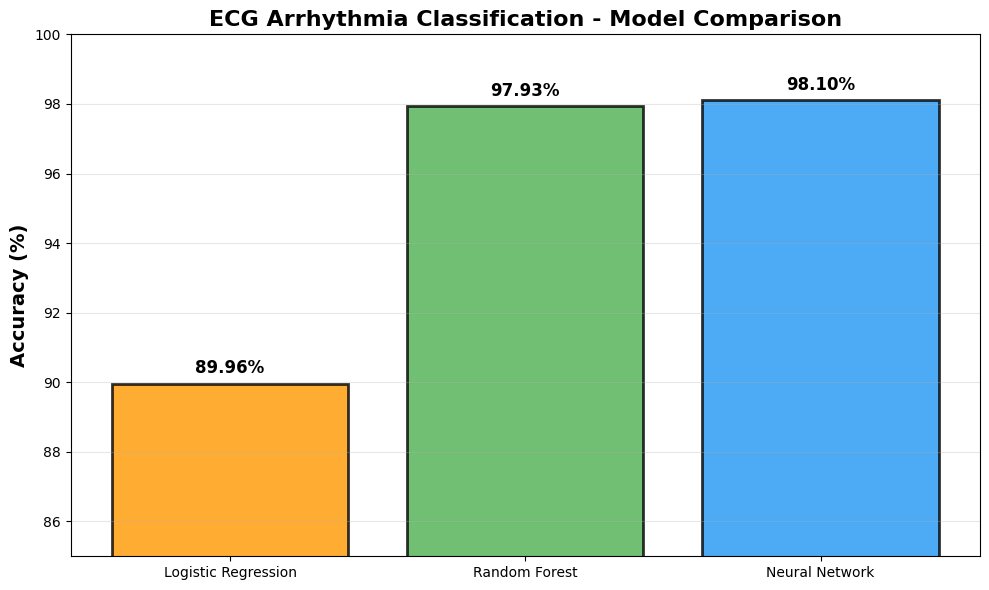

Graph saved as 'model_comparison.png'


In [18]:
# Compare all three models
models = ['Logistic Regression', 'Random Forest', 'Neural Network']
accuracies = [89.96, 97.93, 98.10]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['#ff9800', '#4caf50', '#2196f3'],
               alpha=0.8, edgecolor='black', linewidth=2)

plt.ylabel('Accuracy (%)', fontsize=14, fontweight='bold')
plt.title('ECG Arrhythmia Classification - Model Comparison', fontsize=16, fontweight='bold')
plt.ylim([85, 100])
plt.grid(axis='y', alpha=0.3)

# Add accuracy values on top of bars
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.3,
            f'{acc:.2f}%', ha='center', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("Graph saved as 'model_comparison.png'")

**Creating Confusion Matrix**

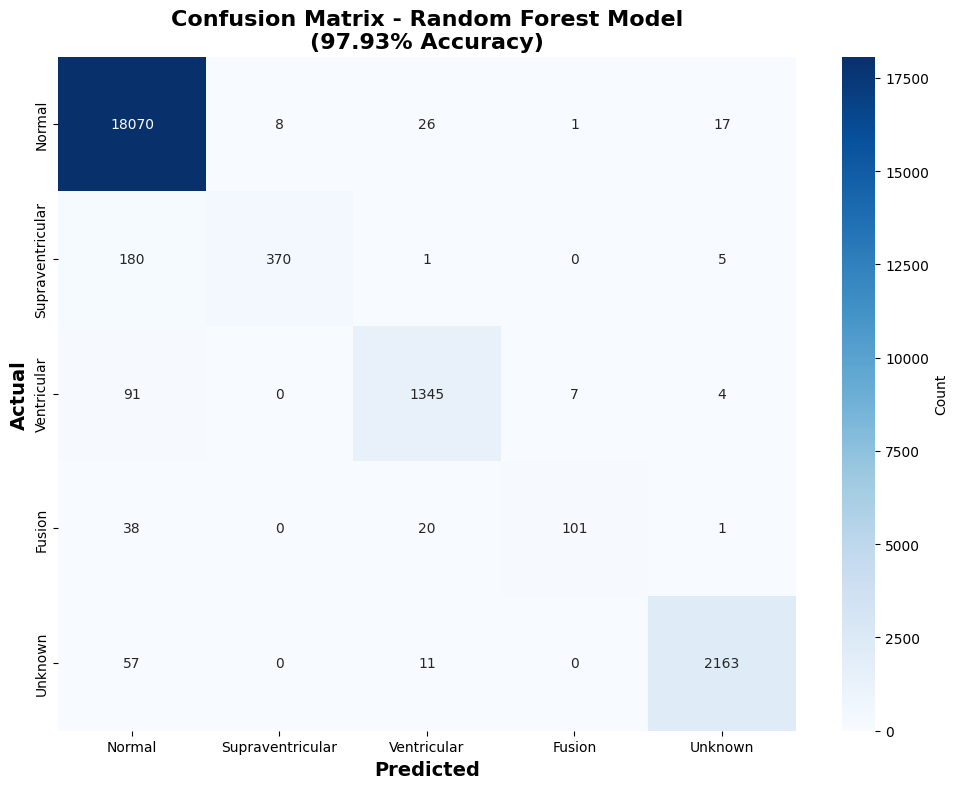

Confusion matrix saved as 'confusion_matrix.png'


In [19]:
from sklearn.metrics import confusion_matrix

# Create confusion matrix for Random Forest (best model)
cm = confusion_matrix(y_test, y_pred_rf)

# Plot it
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'})

plt.xlabel('Predicted', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix - Random Forest Model\n(97.93% Accuracy)',
          fontsize=16, fontweight='bold')

plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("Confusion matrix saved as 'confusion_matrix.png'")

**Plotting Sample Heartbeats from Each Class**

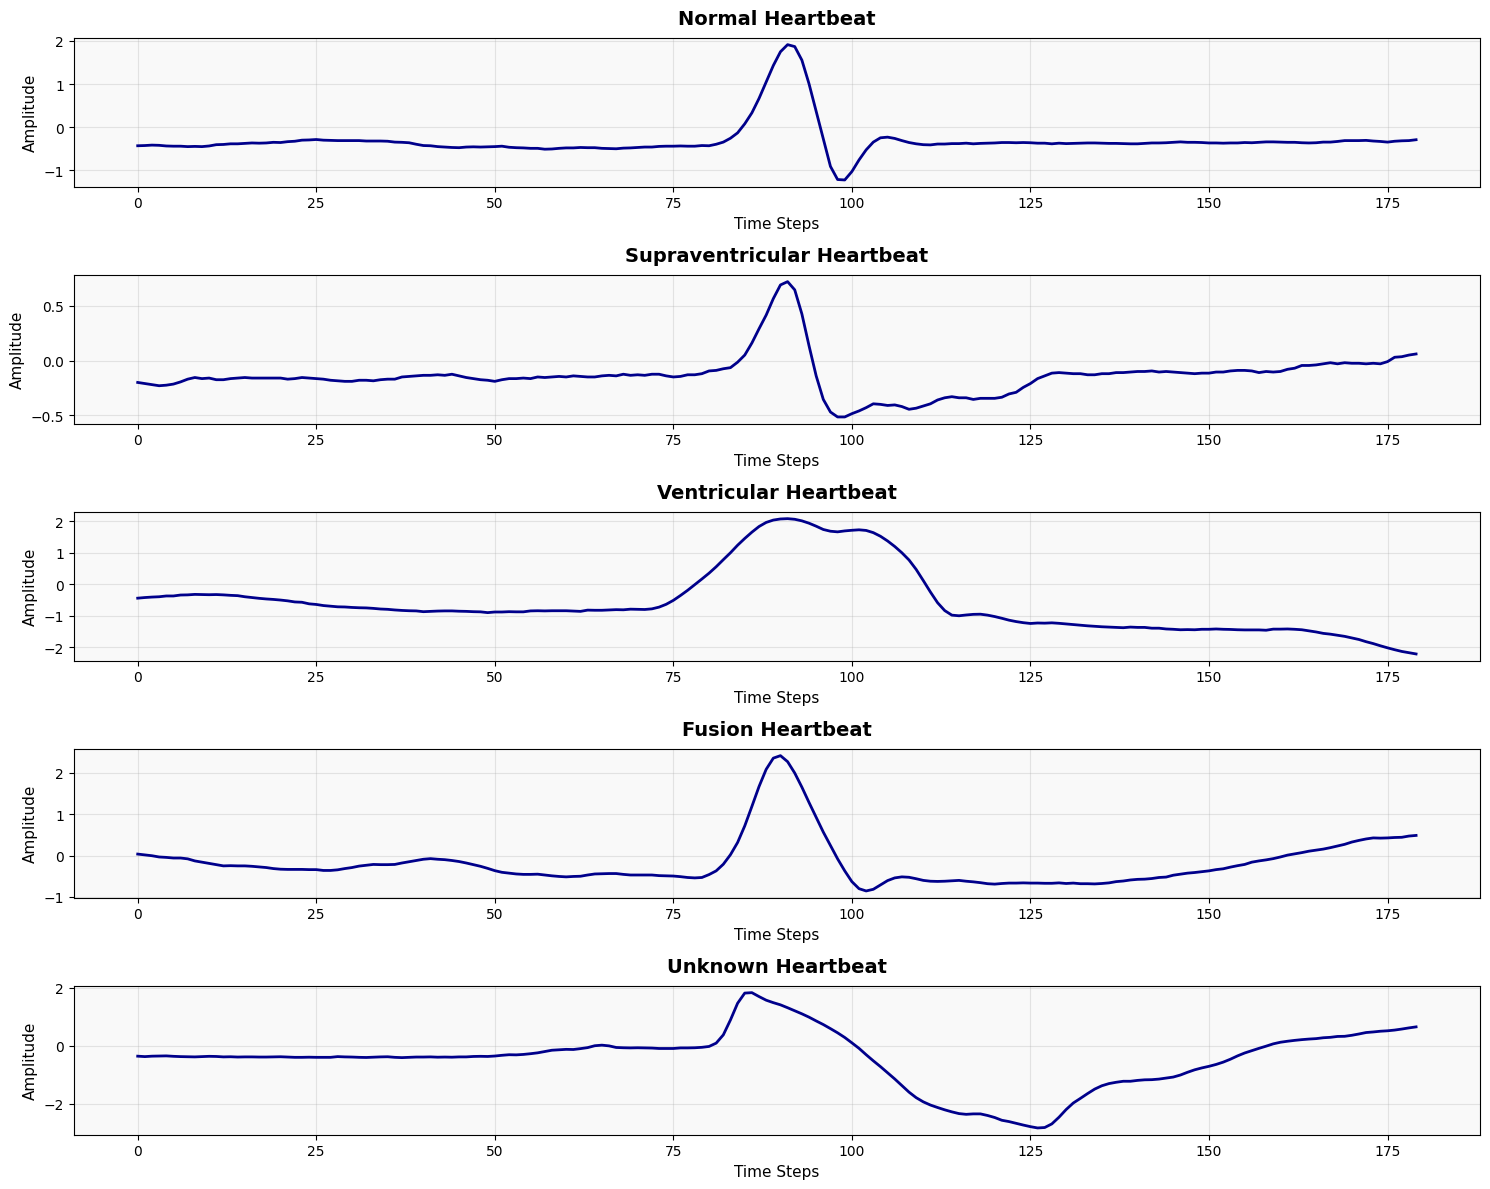

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Plot one example of each beat type
fig, axes = plt.subplots(5, 1, figsize=(15, 12))

for i in range(5):
    # Find first heartbeat of this type in test set
    idx = np.where(y_test == i)[0][0]
    sample_beat = X_test[idx]

    axes[i].plot(sample_beat, linewidth=2, color='darkblue')
    axes[i].set_title(f'{class_names[i]} Heartbeat',
                     fontsize=14, fontweight='bold', pad=10)
    axes[i].set_xlabel('Time Steps', fontsize=11)
    axes[i].set_ylabel('Amplitude', fontsize=11)
    axes[i].grid(True, alpha=0.3)
    axes[i].set_facecolor('#f9f9f9')

plt.tight_layout()
plt.savefig('sample_heartbeats.png', dpi=300, bbox_inches='tight')
plt.show()

**Saving the Trained Models**

In [21]:
import pickle

print("Saving your models...")
print("")

# Save Random Forest model (best traditional ML model)
with open('rf_ecg_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)
print("Random Forest saved: rf_ecg_model.pkl")

# Save the scaler (important!)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("Scaler saved: scaler.pkl")

# Save Neural Network
model.save('nn_ecg_model.h5')
print("Neural Network saved: nn_ecg_model.h5")

print("")
print("All models saved successfully!")

Saving your models...

Random Forest saved: rf_ecg_model.pkl
Scaler saved: scaler.pkl
Neural Network saved: nn_ecg_model.h5

All models saved successfully!


**Downloading all the files**

In [22]:
from google.colab import files

print("Downloading all files to your computer...")
print("(Multiple download popups will appear - click Save for each one)")
print("")

# Download models
files.download('rf_ecg_model.pkl')
files.download('scaler.pkl')
files.download('nn_ecg_model.h5')

# Download images
files.download('model_comparison.png')
files.download('confusion_matrix.png')
files.download('sample_heartbeats.png')

print("")
print("All files downloaded!")

(Multiple download popups will appear - click Save for each one)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


All files downloaded!
